# OpenStreetMap & Shapefile example 

#### Author : Gwanjun Shin

Using matplotlib and numpy, we gonna address how to handle map file with python

How to get OSM file   
you can use Korea GIS system and https://www.openstreetmap.org/#map=17/35.70463/128.45739


## Prerequisite

In [ ]:
!pip3 install matplotlib
!pip3 install pyshp
!pip3 install numpy
!pip3 install osmnx #if rtree has occured "sudo apt install libspatialindex-dev python-rtree"


In [1]:
import matplotlib.pyplot as plt
%matplotlib notebook
import osmnx
import osmnx as ox, networkx as nx, geopandas as gpd
import shapely
import geopandas as gpd

<IPython.core.display.Javascript object>


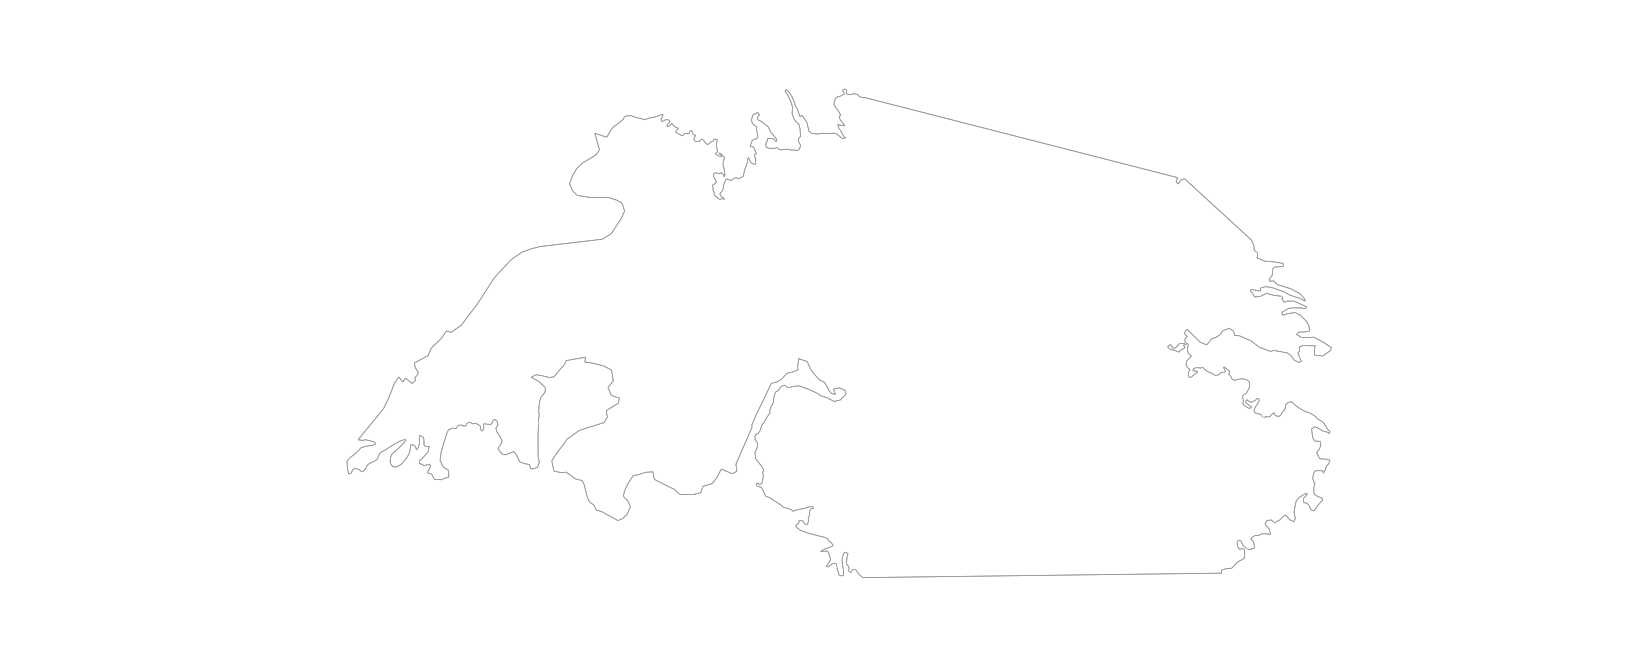

In [13]:
G = ox.graph_from_file("map-osmorg.osm", simplify=False)
# https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.core.graph_from_file

fig, ax = ox.plot_graph(G, node_size=0, edge_linewidth=0.5)

<IPython.core.display.Javascript object>


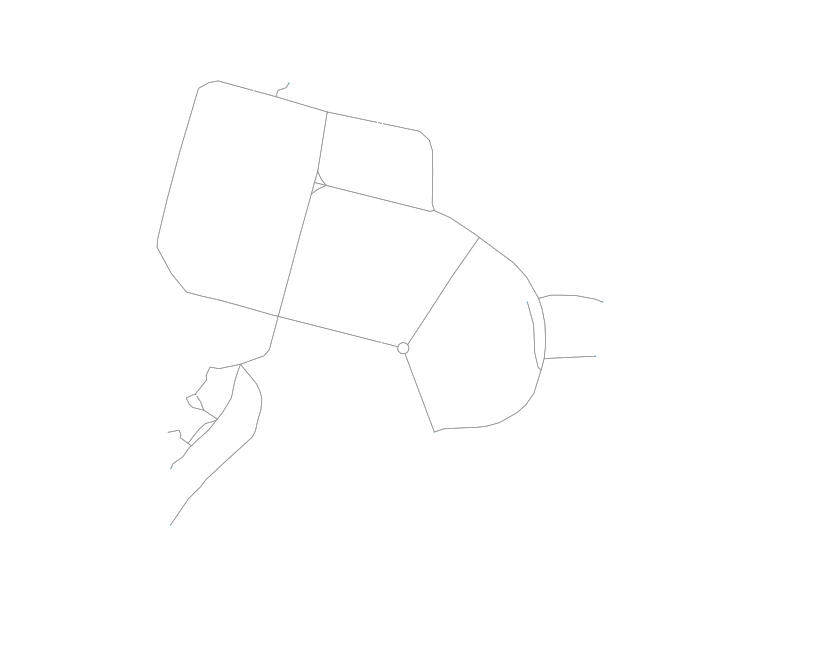

{'n': 30, 'm': 78, 'k_avg': 5.2, 'intersection_count': 25, 'streets_per_node_avg': 2.7666666666666666, 'streets_per_node_counts': {0: 0, 1: 5, 2: 0, 3: 22, 4: 3}, 'streets_per_node_proportion': {0: 0.0, 1: 0.16666666666666666, 2: 0.0, 3: 0.7333333333333333, 4: 0.1}, 'edge_length_total': 10762.456000000002, 'edge_length_avg': 137.98020512820514, 'street_length_total': 5381.227999999999, 'street_length_avg': 137.9802051282051, 'street_segments_count': 39, 'node_density_km': None, 'intersection_density_km': None, 'edge_density_km': None, 'street_density_km': None, 'circuity_avg': 1.134870188403036, 'self_loop_proportion': 0.0, 'clean_intersection_count': None, 'clean_intersection_density_km': None}


In [3]:
G = ox.graph_from_bbox(35.7089, 35.6996, 128.4639, 128.4513, network_type='drive')
fig, ax = ox.plot_graph(G, node_size=1, edge_linewidth=0.5)
print(ox.basic_stats(G))

## shp file from korea GIS

we load shp file by geopanda

In [2]:
import os
dgist_shp = []
dgist = {}
for root, dirs, files in os.walk("SEC02_dgist"):
    for file in files:
        if file.endswith(".shp"):
            dgist_shp.append(os.path.join(root, file))
            dgist.update({file.split('.')[0] : gpd.read_file(os.path.join(root, file))})

In [5]:
dgist.keys()

dict_keys(['A1_LANE', 'B3_POST_POINT', 'B2_SURFSIGN_LINE', 'OJ_HIST', 'A2_STOP', 'B1_SIGNAL_POINT', 'B2_SURFSIGN_POINT', 'B2_SURFSIGN_PLANE', 'B1_SIGN_POINT', 'B2_NOAUTONOMOUS_PLANE', 'A3_LINK', 'C1_NODE'])

<IPython.core.display.Javascript object>


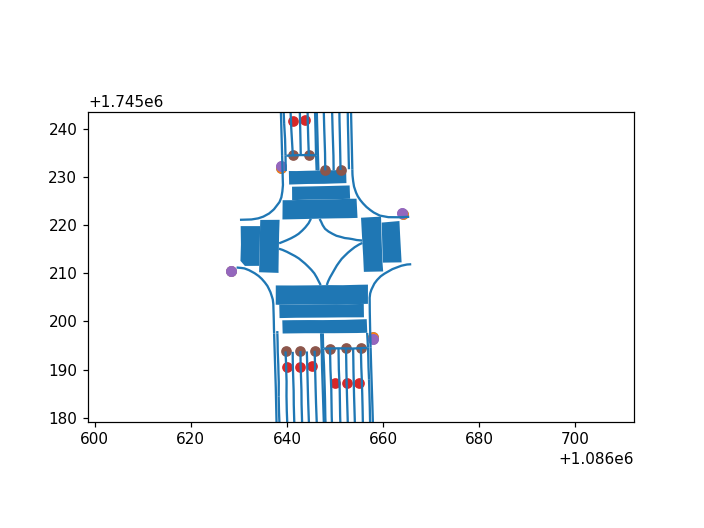

In [3]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for convex in dgist.values():
    convex.plot(ax=ax)

In [4]:
dgist['A2_STOP']

,LINKID,CODE,DATE,REMARK,HDUFID,HISTTYPE,HISTREMARK,geometry
0,157C5264,2,20180430,None,A2ST184A020000,None,None,"LINESTRING Z (1086650.744 1745099.052 42.144, ..."
1,157C5364,2,20180430,None,A2ST184A020001,None,None,"LINESTRING Z (1087533.219 1745399.675 66.430, ..."
2,157C5016,2,20180430,None,A2ST184A020002,None,None,"LINESTRING Z (1087528.115 1745357.805 66.058, ..."
3,157C5020,2,20180430,None,A2ST184A020003,None,None,"LINESTRING Z (1087210.401 1745174.031 52.428, ..."
4,157C5010,2,20180430,None,A2ST184A020004,None,None,"LINESTRING Z (1087161.616 1745155.979 51.914, ..."
...,...,...,...,...,...,...,...,...
390,157C517102,2,20190530,None,A2ST195J000028,수정,형상수정,"LINESTRING Z (1086933.340 1744460.787 52.846, ..."
391,157C516802,2,20190530,None,A2ST195J000029,수정,형상수정,"LINESTRING Z (1086933.658 1744436.297 52.953, ..."
392,157C517002,2,20190530,None,A2ST195J000030,수정,형상수정,"LINESTRING Z (1086935.305 1744413.795 53.396, ..."
393,157C516002,2,20190530,None,A2ST195J000031,수정,형상수정,"LINESTRING Z (1086920.869 1744964.894 47.833, ..."


In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

dgist['A2_STOP'].plot(ax = ax)
dgist['A1_LANE'].plot(ax = ax)
dgist['A3_LINK'].plot(ax = ax)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


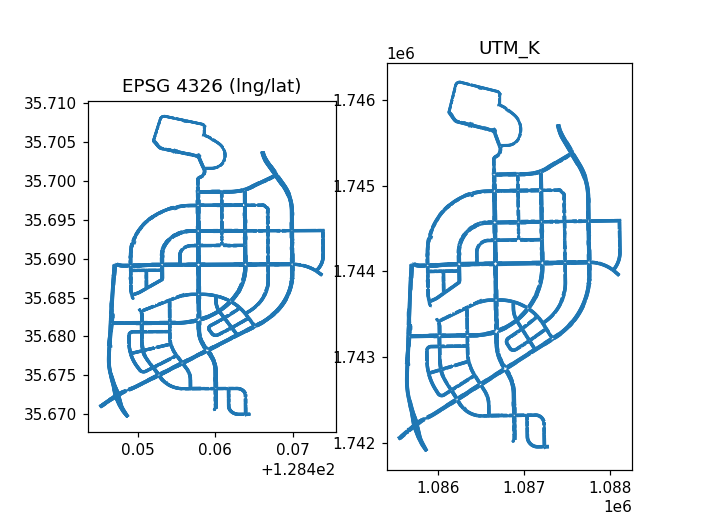

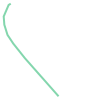

In [5]:

tmp = dgist['A1_LANE'].to_crs(epsg=4326)
tmp2 = dgist['A3_LINK'].to_crs(epsg=4326)
# EPSG Explaination https://rightstone032.tistory.com/7

tmp.crs

fig = plt.figure()
ax = fig.add_subplot(1,2,1)
ax.set_title("EPSG 4326 (lng/lat)")

ax2 = fig.add_subplot(1,2,2)

ax2.set_title("UTM_K")


tmp.plot(ax=ax)
tmp2.plot(ax=ax)

dgist['A1_LANE'].plot(ax=ax2)
#dgist['A1_LANE'].geometry

tmp.geometry[0]


(array('d', [128.45592416970078, 128.4559233439412, 128.4559214287226, 128.45592167155758, 128.45592290348884, 128.45592513718947, 128.4559296528769, 128.45594274269448]), array('d', [35.7077950143067, 35.707794523696165, 35.70779005199321, 35.70778685232117, 35.70778288172262, 35.70777952875776, 35.70777385089902, 35.707759033253026]))


<IPython.core.display.Javascript object>


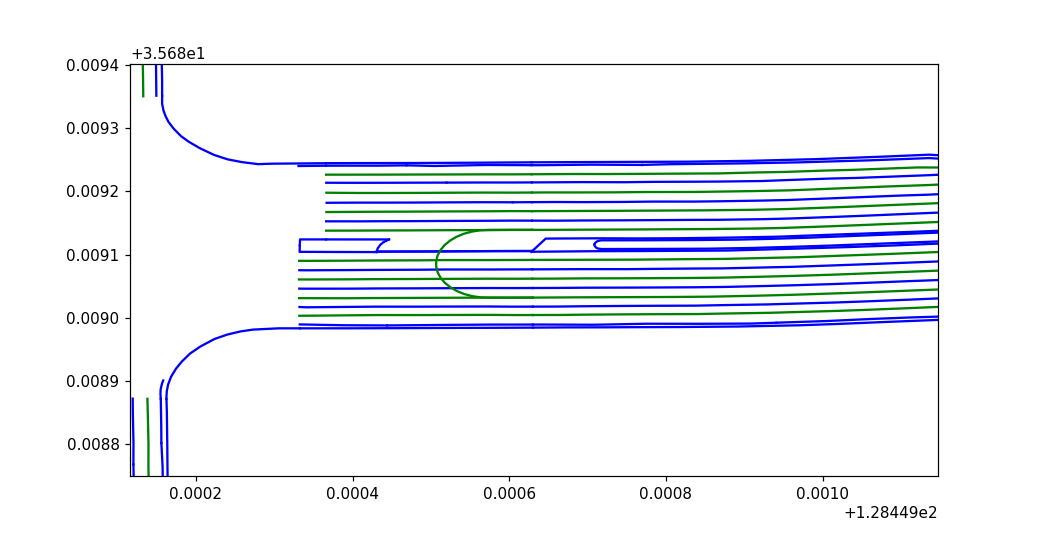

In [12]:
# Below code is for plotting map by raw coord without geopandas function
# Just using geopanda function, But you may check the type and approach
# Author : Gwanjun shin

print(tmp.geometry[0].xy)
# https://2innnnn0.github.io/%EC%89%BD%EA%B2%8C-%EC%8B%9C%EC%9E%91%ED%95%98%EB%8A%94-PyGIS/
from shapely.geometry import LineString
import shapely

fig = plt.figure()

ax = fig.add_subplot(1,1,1)


for part in tmp.geometry:
    if type(part) == shapely.geometry.multilinestring.MultiLineString:
        for line in part:
            lat, lng = line.xy
            ax.plot(lat, lng, color='blue')
        continue
            # https://gis.stackexchange.com/questions/104312/multilinestring-to-separate-individual-lines-using-python-with-gdal-ogr-fiona
        
    lat, lng = part.xy
    ax.plot(lat, lng, color='blue')
    
for part in tmp2.geometry:
    if type(part) == shapely.geometry.multilinestring.MultiLineString:
        for line in part:
            lat, lng = line.xy
            ax.plot(lat, lng, color='green')
        continue
            # https://gis.stackexchange.com/questions/104312/multilinestring-to-separate-individual-lines-using-python-with-gdal-ogr-fiona
        
    lat, lng = part.xy
    ax.plot(lat, lng, color='green')

## Blue is Lane, Green is Center Guide line

<IPython.core.display.Javascript object>


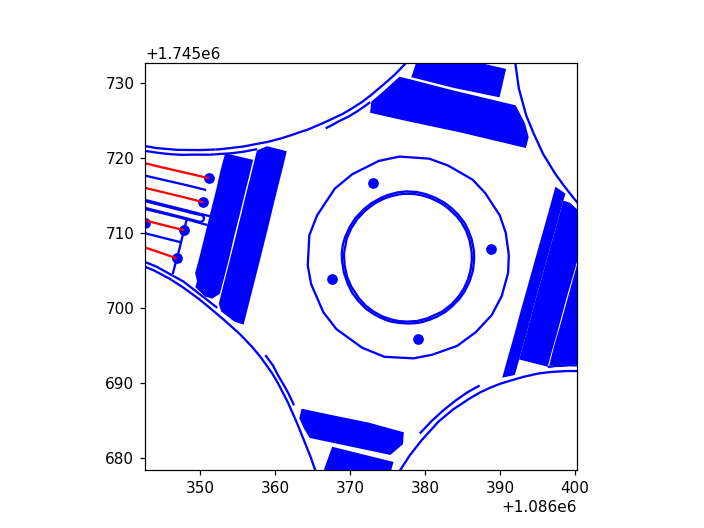

In [22]:

fig = plt.figure()

ax = fig.add_subplot(1,1,1)

for key, convex in dgist.items():
    params = {'color' : 'blue'}
    if key == "A3_LINK" : params.update({'color' : 'red'})
    convex.plot(ax=ax, **params)
    
